# MUHAMMAD REALDI
# 09011281823070
# SK5B Indralaya
Sumber = https://www.kaggle.com/utathya/ann-on-electricity-consumption

BACK PROPAGATION

pada bagian ini Hidden Layers, input dan ouput layer ditambahkan, dengan kedua input layer menggunakan aktivasi ReLU sedangkan output layer menggunakan aktivasi sigmoid.

dari input menuju ke hidden layer 1, hidden layer 1 ke hidden layer 2, dan hidden layer 2 menuju ke outputdisebut Forward Pass, karena aktivasinya menggunakan ReLU maka menggunakan f(x)=max(0,x)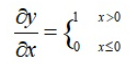

lalu untuk aktivasi sigmoid akan diturunkan menjadi :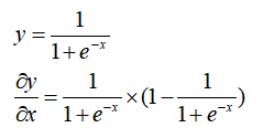

selanjutnya adalah backward pass yang akan mengalirkan loss keseluruh node - node sehingga didapatkan gradient loss

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
#print(check_output(["ls", "../input"]).decode("utf8"))

# Any results you write to the current directory are saved as output.

**My Functions**

In [2]:
def datetounix(df):
    # Initialising unixtime list
    unixtime = []
    
    # Running a loop to convert Date to seconds
    for date in df['datetime']:
        unixtime.append(time.mktime(date.timetuple()))
    
    # Replacing Date with unixtime list
    df['datetime'] = unixtime
    return(df)

**Import Libraries**

In [3]:
# import libs
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import time
from sklearn.ensemble import ExtraTreesClassifier
import operator
from sklearn.preprocessing import StandardScaler
import keras
from keras.models import Sequential
from keras.layers import Dense


# read train dataframe
# file_path = os.path.join(os.path.abspath(''), 'train.csv')
df_train = pd.read_csv("train.csv", encoding='ISO-8859-1', engine='c')

# read test dataframe
# file_path = os.path.join(os.path.abspath(''), 'test.csv')
df_test = pd.read_csv("test.csv", encoding='ISO-8859-1', engine='c')
df_train.info()

Using TensorFlow backend.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26496 entries, 0 to 26495
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       26496 non-null  int64  
 1   datetime                 26496 non-null  object 
 2   temperature              26496 non-null  float64
 3   var1                     26496 non-null  float64
 4   pressure                 26496 non-null  float64
 5   windspeed                26496 non-null  float64
 6   var2                     26496 non-null  object 
 7   electricity_consumption  26496 non-null  float64
dtypes: float64(5), int64(1), object(2)
memory usage: 1.6+ MB


**Data Cleaning**

Uploading and cleaning of data.

In [4]:
# Converting to datetime
df_train['datetime'] = pd.to_datetime(df_train['datetime'])
df_test['datetime'] = pd.to_datetime(df_test['datetime'])
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8568 entries, 0 to 8567
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   ID           8568 non-null   int64         
 1   datetime     8568 non-null   datetime64[ns]
 2   temperature  8568 non-null   float64       
 3   var1         8568 non-null   float64       
 4   pressure     8568 non-null   float64       
 5   windspeed    8568 non-null   float64       
 6   var2         8568 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 468.7+ KB


In [5]:
# Creating features from DateTime for train data

df_test['Weekday'] = [datetime.weekday(date) for date in df_test.datetime]
df_test['Year'] = [date.year for date in df_test.datetime]
df_test['Month'] = [date.month for date in df_test.datetime]
df_test['Day'] = [date.day for date in df_test.datetime]
df_test['Time'] = [((date.hour*60+(date.minute))*60)+date.second for date in df_test.datetime]
df_test['Week'] = [date.week for date in df_test.datetime]
df_test['Quarter'] = [date.quarter for date in df_test.datetime]

# Creating features from DateTime for test data

df_train['Weekday'] = [datetime.weekday(date) for date in df_train.datetime]
df_train['Year'] = [date.year for date in df_train.datetime]
df_train['Month'] = [date.month for date in df_train.datetime]
df_train['Day'] = [date.day for date in df_train.datetime]
df_train['Time'] = [((date.hour*60+(date.minute))*60)+date.second for date in df_train.datetime]
df_train['Week'] = [date.week for date in df_train.datetime]
df_train['Quarter'] = [date.quarter for date in df_train.datetime]

**Data Preparation**

In [6]:
# Create Dummy Variables for Train set
df_train.loc[df_train.var2 == 'A', 'var2A'] = 1
df_train.loc[df_train.var2 == 'B', 'var2B'] = 1

df_train['var2A'].fillna(0, inplace=True)
df_train['var2B'].fillna(0, inplace=True)

df_train.drop(['var2'], axis=1, inplace=True)

# Create Dummy Variables for Test set
df_test.loc[df_test.var2 == 'A', 'var2A'] = 1
df_test.loc[df_test.var2 == 'B', 'var2B'] = 1

df_test['var2A'].fillna(0, inplace=True)
df_test['var2B'].fillna(0, inplace=True)

df_test.drop(['var2'], axis=1, inplace=True)

# Creating X_test
X_test = datetounix(df_test).drop(['ID'], axis=1).values

# Remove target column from the df
df_train_features = df_train.drop(['electricity_consumption', 'ID'], axis=1)

# Convet timestamp to seconds
df_train_features = datetounix(df_train_features)

# store features in X array
X = df_train_features.values
y = df_train['electricity_consumption'].values

**Visualisation of features**

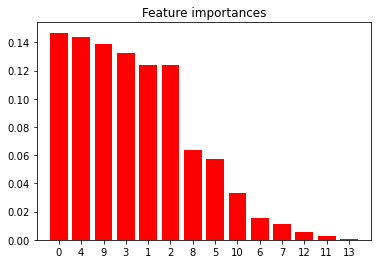

In [7]:
# create an instance for tree feature selection
tree_clf = ExtraTreesClassifier()

# fit the model
tree_clf.fit(X, y)

# Preparing variables
importances = tree_clf.feature_importances_
feature_names = df_train_features.columns.tolist()

feature_imp_dict = dict(zip(feature_names, importances))
sorted_features = sorted(feature_imp_dict.items(), key=operator.itemgetter(1), reverse=True)

indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("feature %d : %s (%f)" % (indices[f], sorted_features[f][0], sorted_features[f][1]))

# Plot the feature importances of the forest
plt.figure(0)
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [8]:
############ Data Scaling ###################
sc = StandardScaler()
X = sc.fit_transform(X)
X_test = sc.transform(X_test)

y_norm = (y - min(y))/(max(y) - min(y))
y_norm

array([0.03465347, 0.02970297, 0.04207921, ..., 0.03217822, 0.02970297,
       0.02970297])

**Implementing ANN**

In [9]:
# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 10, kernel_initializer = 'uniform', activation = 'relu', input_dim = 14))

# Adding the second hidden layer
classifier.add(Dense(units = 5, kernel_initializer = 'uniform', activation = 'relu'))

# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['mae'])

# Fitting the ANN to the training set
classifier.fit(X, y_norm, batch_size = 10, epochs = 100)

# Part 3 - Making the predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred * (max(y) - min(y))) + min(y)

predictions = [int(elem) for elem in y_pred]

df_solution = pd.DataFrame()
df_solution['ID'] = df_test.ID

# Prepare Solution dataframe
df_solution['electricity_consumption'] = predictions
df_solution['electricity_consumption'].unique()

df_solution

Epoch 1/100
26496/26496 [==============================] - 18s 669us/step - loss: 0.0133 - mae: 0.0742
Epoch 2/100
26496/26496 [==============================] - 2s 73us/step - loss: 0.0047 - mae: 0.0492
Epoch 3/100
26496/26496 [==============================] - 2s 73us/step - loss: 0.0046 - mae: 0.0479
Epoch 4/100
26496/26496 [==============================] - 2s 73us/step - loss: 0.0044 - mae: 0.0468: 0s - loss: 0.00
Epoch 5/100
26496/26496 [==============================] - 2s 77us/step - loss: 0.0043 - mae: 0.0462
Epoch 6/100
26496/26496 [==============================] - 2s 77us/step - loss: 0.0043 - mae: 0.0458
Epoch 7/100
26496/26496 [==============================] - 2s 78us/step - loss: 0.0042 - mae: 0.0456
Epoch 8/100
26496/26496 [==============================] - 2s 78us/step - loss: 0.0042 - mae: 0.0454: 0s - loss: 0.004
Epoch 9/100
26496/26496 [==============================] - 2s 77us/step - loss: 0.0042 - mae: 0.0452: 0s - loss: 0.
Epoch 10/100
26496/26496 [=============

26496/26496 [==============================] - 2s 82us/step - loss: 0.0038 - mae: 0.0434
Epoch 79/100
26496/26496 [==============================] - 2s 81us/step - loss: 0.0038 - mae: 0.0433
Epoch 80/100
26496/26496 [==============================] - 2s 79us/step - loss: 0.0038 - mae: 0.0433
Epoch 81/100
26496/26496 [==============================] - 2s 78us/step - loss: 0.0038 - mae: 0.0433
Epoch 82/100
26496/26496 [==============================] - 2s 78us/step - loss: 0.0038 - mae: 0.0433
Epoch 83/100
26496/26496 [==============================] - 2s 79us/step - loss: 0.0038 - mae: 0.0433
Epoch 84/100
26496/26496 [==============================] - 2s 78us/step - loss: 0.0038 - mae: 0.0433
Epoch 85/100
26496/26496 [==============================] - 2s 79us/step - loss: 0.0038 - mae: 0.0432
Epoch 86/100
26496/26496 [==============================] - 2s 81us/step - loss: 0.0038 - mae: 0.0432
Epoch 87/100
26496/26496 [==============================] - 2s 79us/step - loss: 0.0038 - mae: 

,ID,electricity_consumption
0,552,175
1,553,174
2,554,174
3,555,174
4,556,282
...,...,...
8563,35059,174
8564,35060,174
8565,35061,174
8566,35062,174
